In [1]:
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

data = pd.read_csv('data/kidiq.csv')
data.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27


In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import patsy
from patsy import dmatrices
import statsmodels
import statsmodels.api as sm #Application Programming Interface
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

import warnings
warnings.filterwarnings('ignore')

In [3]:
data

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27
...,...,...,...,...,...
429,94,0,84.877412,4,21
430,76,1,92.990392,4,23
431,50,0,94.859708,2,24
432,88,1,96.856624,2,21


In [4]:
print('df :', data.shape)

df : (434, 5)


In [5]:
# Data type 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   kid_score  434 non-null    int64  
 1   mom_hs     434 non-null    int64  
 2   mom_iq     434 non-null    float64
 3   mom_work   434 non-null    int64  
 4   mom_age    434 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 17.1 KB


In [6]:
data[data['kid_score'].isna()].head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age


In [7]:
data = data.dropna()
print(data.isnull().sum().sum())

0


In [8]:
data.describe()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
count,434.000000,434.000000,434.000000,434.000000,434.000000
mean,86.797235,0.785714,100.000000,2.896313,22.785714
std,20.410688,0.410799,15.000000,1.181394,2.701070
min,20.000000,0.000000,71.037405,1.000000,17.000000
25%,74.000000,1.000000,88.660321,2.000000,21.000000
50%,90.000000,1.000000,97.915254,3.000000,23.000000
75%,102.000000,1.000000,110.272742,4.000000,25.000000
max,144.000000,1.000000,138.893106,4.000000,29.000000


In [9]:
# 추가 컬럼 생성
data['mom_iq_c'] = data['mom_iq'] - data['mom_iq'].mean()
data['mom_age_c'] = data['mom_age'] - data['mom_age'].mean()
data

,kid_score,mom_hs,mom_iq,mom_work,mom_age,mom_iq_c,mom_age_c
0,65,1,121.117529,4,27,21.117529,4.214286
1,98,1,89.361882,4,25,-10.638118,2.214286
2,85,1,115.443165,4,27,15.443165,4.214286
3,83,1,99.449639,3,25,-0.550361,2.214286
4,115,1,92.745710,4,27,-7.254290,4.214286
...,...,...,...,...,...,...,...
429,94,0,84.877412,4,21,-15.122588,-1.785714
430,76,1,92.990392,4,23,-7.009608,0.214286
431,50,0,94.859708,2,24,-5.140292,1.214286
432,88,1,96.856624,2,21,-3.143376,-1.785714


array([[<Axes: title={'center': 'kid_score'}>,
        <Axes: title={'center': 'mom_hs'}>,
        <Axes: title={'center': 'mom_iq'}>],
       [<Axes: title={'center': 'mom_work'}>,
        <Axes: title={'center': 'mom_age'}>,
        <Axes: title={'center': 'mom_iq_c'}>],
       [<Axes: title={'center': 'mom_age_c'}>, <Axes: >, <Axes: >]],
      dtype=object)

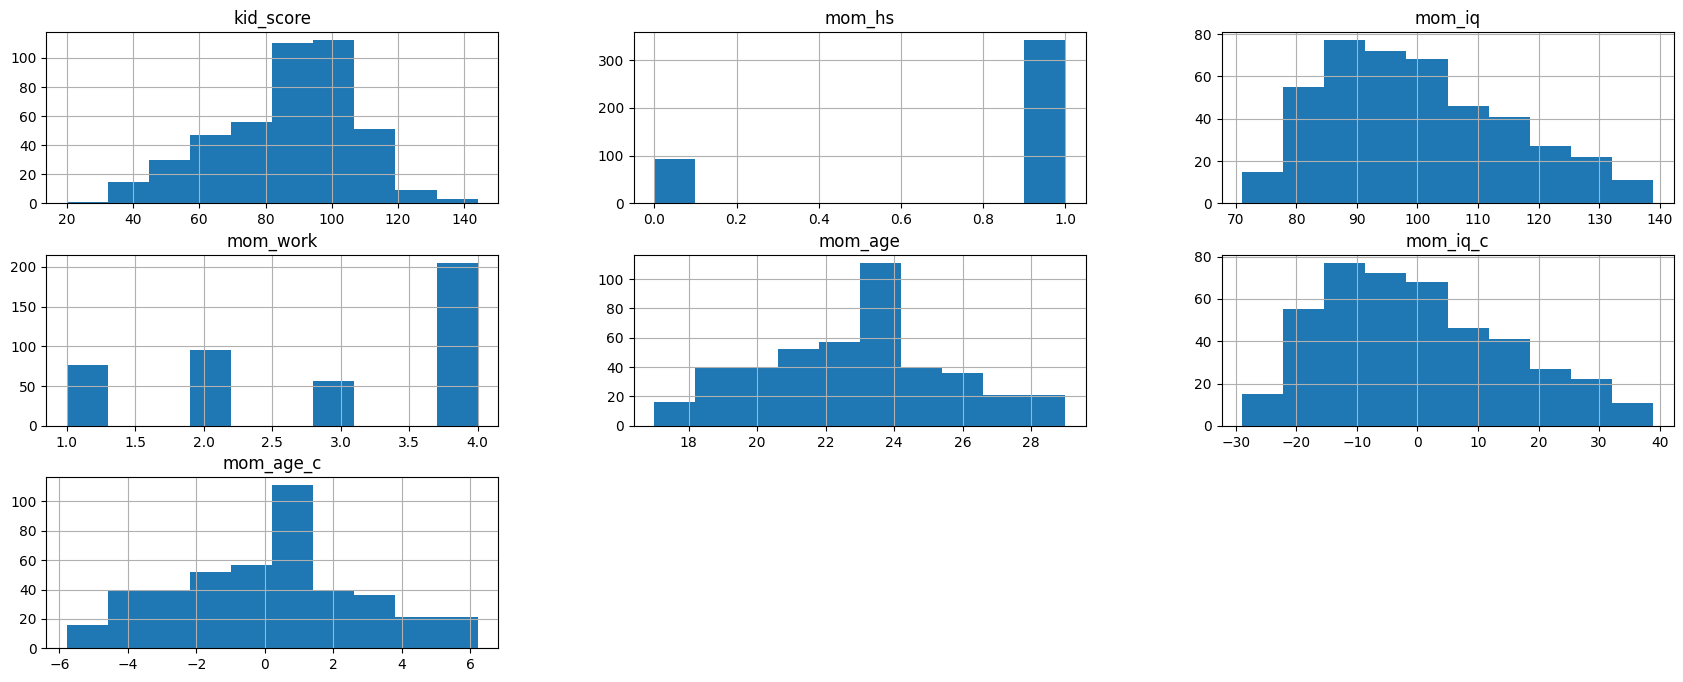

In [10]:
data.hist(figsize=(21,8))

In [11]:
# Fit regression model using centred version of mom_iq
# OLS: Ordinary Least Squares

fit1 = smf.ols('kid_score ~ 1 + mom_hs + mom_iq_c + mom_hs:mom_iq_c', data=data).fit()

print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     42.84
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           3.07e-24
Time:                        17:20:33   Log-Likelihood:                -1867.5
No. Observations:                 434   AIC:                             3743.
Df Residuals:                     430   BIC:                             3759.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          85.4069      2.218     

In [12]:
y = data['kid_score']
X = data[['mom_hs', 'mom_iq', 'mom_age_c']]
X = sm.add_constant(X)

model1 = sm.OLS(y, X)
res1 = model1.fit()

print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     39.25
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           1.94e-22
Time:                        17:20:33   Log-Likelihood:                -1871.8
No. Observations:                 434   AIC:                             3752.
Df Residuals:                     430   BIC:                             3768.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.1058      5.905      4.421      0.0

In [13]:
features = res1.params.index 
coefs = [round(val, 4) for val in res1.params.values]

dict(zip(features, coefs))

{'const': 26.1058, 'mom_hs': 5.6472, 'mom_iq': 0.5625, 'mom_age_c': 0.2248}

In [14]:
print("In-sample R-squared: %.3f" % round(res1.rsquared, 3))

In-sample R-squared: 0.215


In [15]:
print("In-smaple RMSE: %.3f" % round(np.mean((y - res1.fittedvalues)**2)**0.5, 3))

In-smaple RMSE: 18.063


In [16]:
def abline(intercept, slope, **params):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', **params)

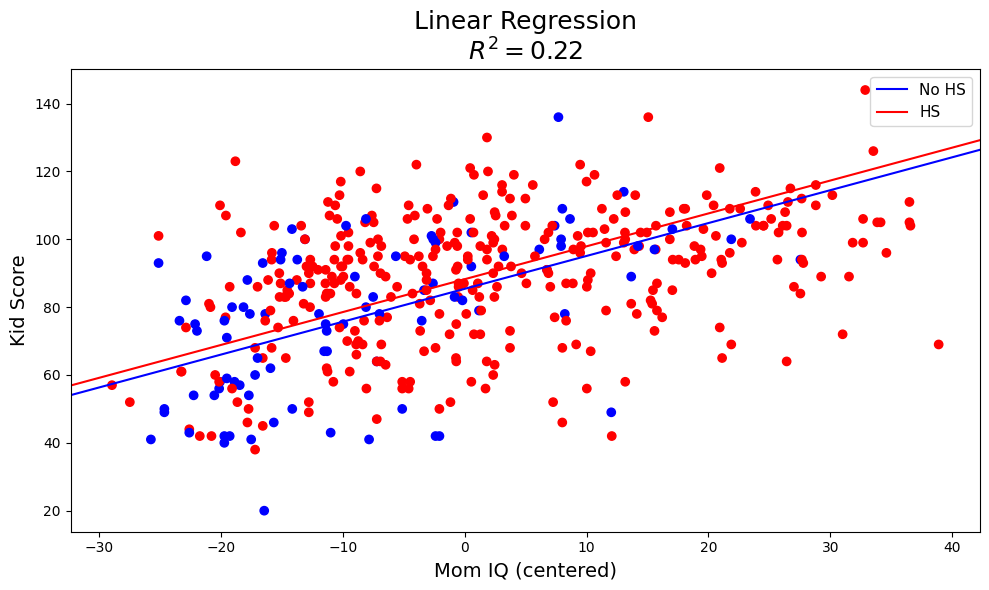

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = {1:'red', 0:'blue'}
b_hat = fit1.params

ax.scatter(data.mom_iq_c, data.kid_score, color=data.mom_hs.map(colors))

sm.graphics.abline_plot(intercept=b_hat['Intercept'],                 slope=b_hat['mom_iq_c'], color='blue',  label='No HS', ax=ax)
sm.graphics.abline_plot(intercept=b_hat['Intercept']+b_hat['mom_hs'], slope=b_hat['mom_iq_c'], color='red', label='HS',    ax=ax)
ax.set_ylabel('Kid Score', fontsize=14)
ax.set_xlabel('Mom IQ (centered)', fontsize=14)
ax.legend(fontsize=11)
ax.set_title('Linear Regression\n$R^2= %.2f$' % fit1.rsquared_adj, fontsize=18)

fig.tight_layout();

K-fold cross valiation using statsmodels and sklearn

In [18]:
len(y), round(len(y)*(4/5)) # 80% of the data

(434, 347)

In [19]:
y = data['kid_score']

X = data[['mom_hs', 'mom_iq_c']]
X = sm.add_constant(X)

X[:5]

,const,mom_hs,mom_iq_c
0,1.0,1,21.117529
1,1.0,1,-10.638118
2,1.0,1,15.443165
3,1.0,1,-0.550361
4,1.0,1,-7.254290


R-Squared

In [20]:
kfold = KFold(n_splits=5, shuffle=True, random_state=123) 

scores = []
for k, (train, test) in enumerate(kfold.split(X, y)):     
    res1 = sm.OLS(y[train], X.loc[train,:]).fit()         
    preds = res1.predict(X.loc[test,:])                   
    score = r2_score(y[test], preds)                      
    scores.append(score)
    print('Fold: {:2d}, Training size: {}, Out-of-sample R-squared: {:.3f}'.format(k+1, len(y[train]), score))
    
print('\nCV R-squared: {:.3f} (+/- {:.3f})'.format(np.mean(scores), np.std(scores)))

Fold:  1, Training size: 347, Out-of-sample R-squared: 0.205
Fold:  2, Training size: 347, Out-of-sample R-squared: 0.070
Fold:  3, Training size: 347, Out-of-sample R-squared: 0.302
Fold:  4, Training size: 347, Out-of-sample R-squared: 0.137
Fold:  5, Training size: 348, Out-of-sample R-squared: 0.264

CV R-squared: 0.196 (+/- 0.084)


In [21]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42) 

kfold.split(X, y)

<generator object _BaseKFold.split at 0x000001622E90B400>

RMSE

In [22]:
y = data['kid_score']

X = data[['mom_hs', 'mom_iq_c']]
X = sm.add_constant(X)

X[:5]

,const,mom_hs,mom_iq_c
0,1.0,1,21.117529
1,1.0,1,-10.638118
2,1.0,1,15.443165
3,1.0,1,-0.550361
4,1.0,1,-7.254290


In [24]:
kfold = KFold(n_splits=5, shuffle=True, random_state=123)      

scores = []
for k, (train, test) in enumerate(kfold.split(X, y)):         
    res1 = sm.OLS(y[train], X.loc[train,:]).fit()              
    preds = res1.predict(X.loc[test,:])                        
    score = mean_squared_error(y[test], preds, squared=False)  
    scores.append(score)
    print('Fold: {:2d}, Training size: {}, Out-of-sample RMSE: {:.3f}'.format(k+1, len(y[train]), score))
    
print('\nCV RMSE: {:.3f} (+/- {:.3f})'.format(np.mean(scores), np.std(scores)))

Fold:  1, Training size: 347, Out-of-sample RMSE: 18.394
Fold:  2, Training size: 347, Out-of-sample RMSE: 18.640
Fold:  3, Training size: 347, Out-of-sample RMSE: 17.431
Fold:  4, Training size: 347, Out-of-sample RMSE: 18.849
Fold:  5, Training size: 348, Out-of-sample RMSE: 17.594

CV RMSE: 18.182 (+/- 0.567)


Create an interaction term between mom_hs and mom_iq_c

In [29]:
y = data['kid_score']

data['mom_hs_iq_c'] = data['mom_hs'] * data['mom_iq_c']

X = data[['mom_hs', 'mom_iq_c', 'mom_hs_iq_c']]
X = sm.add_constant(X)

X[-5:]

,const,mom_hs,mom_iq_c,mom_hs_iq_c
429,1.0,0,-15.122588,-0.000000
430,1.0,1,-7.009608,-7.009608
431,1.0,0,-5.140292,-0.000000
432,1.0,1,-3.143376,-3.143376
433,1.0,1,-8.746664,-8.746664


Run 5-fold cross-validation on the expanded model that includes mom_hs, mom_iq_c, and mom_hs * mom_iq_c

In [31]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = []
for k, (train, test) in enumerate(kfold.split(X, y)):
    res1 = sm.OLS(y[train], X.loc[train,:]).fit()
    preds = res1.predict(X.loc[test,:])
    score = r2_score(y[test], preds)
    scores.append(score)
    print('Fold: {:2d}, Training size: {}, Out-of-sample R-squared: {:.3f}'.format(k+1, len(y[train]), score))
    
print('\nCV R-squared: {:.3f} (+/- {:.3f})'.format(np.mean(scores), np.std(scores)))

Fold:  1, Training size: 347, Out-of-sample R-squared: 0.235
Fold:  2, Training size: 347, Out-of-sample R-squared: 0.096
Fold:  3, Training size: 347, Out-of-sample R-squared: 0.197
Fold:  4, Training size: 347, Out-of-sample R-squared: 0.301
Fold:  5, Training size: 348, Out-of-sample R-squared: 0.174

CV R-squared: 0.201 (+/- 0.068)
